In [506]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from datetime import datetime, date
from IPython.display import HTML

from tqdm.notebook import tqdm_notebook

In [656]:
ff = np.load('./fourier_features/fourier_features_5.npy')

In [657]:
ff.shape

(1827, 5000)

In [658]:
raw_data = pd.read_csv('./final_5_year_data.csv')

In [659]:
raw_data

,time,mercury_lambda,mercury_beta,mercury_delta,mercury_x,mercury_y,mercury_z,venus_lambda,venus_beta,venus_delta,...,moon_y,moon_z,sun_lambda,sun_beta,sun_delta,sun_x,sun_y,sun_z,location,moon_phase
0,1995-01-01 00:00:00,291.475,-2.426780,1.364269,0.499000,-1.268421,-0.057767,235.260,0.654436,0.598291,...,-0.142960,0.015451,278.544,-0.026226,1.082362,0.160797,-1.070351,-0.000495,"(4461340.48313723, 919588.07009129, 4449530.22...",3.011374
1,1995-01-02 00:00:00,293.978,-3.152200,1.224535,0.496887,-1.117164,-0.067335,233.627,5.162060,0.584732,...,-0.134865,0.007020,280.411,-0.707829,0.962304,0.173888,-0.946388,-0.011888,"(4461340.48313723, 919588.07009129, 4449530.22...",2.987264
2,1995-01-03 00:00:00,292.832,-3.920130,1.388554,0.537532,-1.276765,-0.094930,237.504,3.540990,0.661286,...,-0.044431,0.005699,281.181,1.027260,1.275371,0.247264,-1.250963,0.022865,"(4461340.48313723, 919588.07009129, 4449530.22...",2.762637
3,1995-01-04 00:00:00,293.292,-3.260380,1.389874,0.548686,-1.274537,-0.079047,235.923,4.262050,0.604079,...,-0.008426,0.001220,283.784,0.600078,1.120540,0.266961,-1.088212,0.011736,"(4461340.48313723, 919588.07009129, 4449530.22...",2.535680
4,1995-01-05 00:00:00,295.938,-1.790130,1.338849,0.585318,-1.203400,-0.041824,236.038,5.161020,0.599849,...,-0.000639,0.000119,284.563,0.804391,0.887621,0.223170,-0.859017,0.012461,"(4461340.48313723, 919588.07009129, 4449530.22...",2.314953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,1999-12-28 00:00:00,266.837,-1.529890,1.440323,-0.079444,-1.437616,-0.038454,235.469,1.327140,1.120496,...,0.019214,0.007131,274.650,-1.450610,1.256524,0.101837,-1.251986,-0.031809,"(4461340.48313723, 919588.07009129, 4449530.22...",1.236322
1823,1999-12-29 00:00:00,266.438,-0.169554,1.306595,-0.081187,-1.304064,-0.003867,237.055,2.412280,1.011803,...,-0.001701,0.004927,277.388,0.568531,0.823647,0.105911,-0.816768,0.008173,"(4461340.48313723, 919588.07009129, 4449530.22...",1.447558
1824,1999-12-30 00:00:00,267.276,0.426823,1.482227,-0.070447,-1.480511,0.011042,237.874,4.194450,1.182125,...,-0.013629,0.003909,278.638,0.426088,1.034700,0.155399,-1.022935,0.007695,"(4461340.48313723, 919588.07009129, 4449530.22...",1.651914
1825,1999-12-31 00:00:00,270.085,-2.711960,1.363907,0.002019,-1.362378,-0.064533,238.366,3.240150,1.146608,...,-0.030295,0.005317,278.971,-0.522349,0.862331,0.134468,-0.851746,-0.007862,"(4461340.48313723, 919588.07009129, 4449530.22...",1.850624


### Data Exploration

In [660]:
# grab raw ecliptical coordinate data
mars_ecliptical = raw_data[['mars_lambda', 'mars_delta']].values

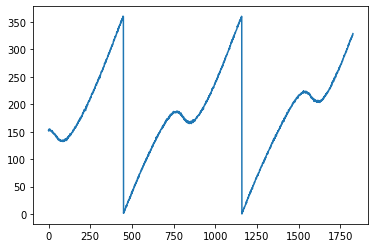

In [661]:
plt.plot(mars_ecliptical[:, 0])

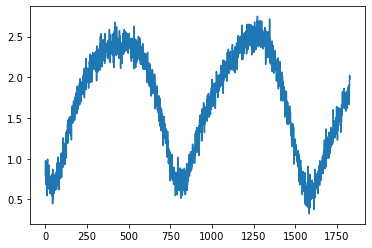

In [662]:
plt.plot(mars_ecliptical[:, 1])

In [663]:
mars_real = raw_data[['mars_x', 'mars_y']].values

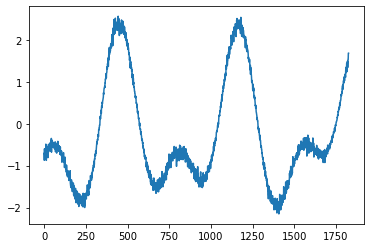

In [664]:
plt.plot(mars_real[:, 0])

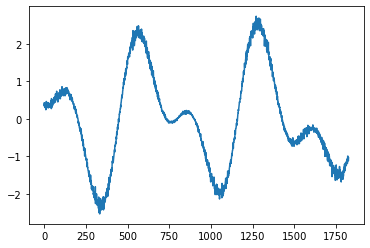

In [665]:
plt.plot(mars_real[:, 1])

In [666]:
# create complex coordinates
# convert degrees to radians
mars_ecliptical[:, 0] = mars_ecliptical[:, 0] * (np.pi / 180)
mars_y = mars_complex = mars_ecliptical[:, 1] * (np.cos(mars_ecliptical[:, 0]) + 1j * np.sin(mars_ecliptical[:, 0]))

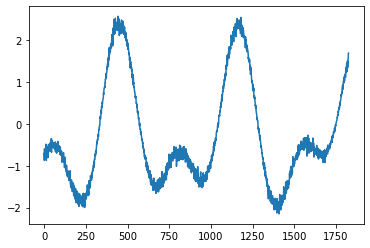

In [667]:
plt.plot(mars_complex.real)

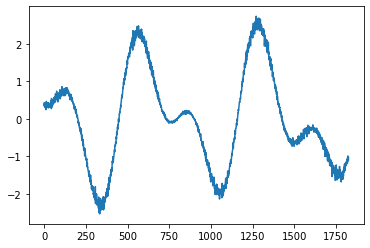

In [668]:
plt.plot(mars_complex.imag)

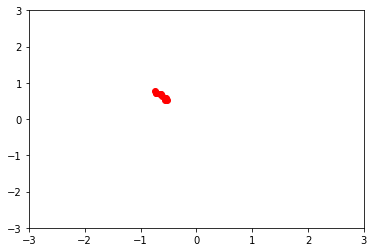

In [669]:
# temp_real, temp_imag = np.array([mars_y.real[:2]]), np.array([mars_y.imag[:2]])
fig = plt.figure()
ax = plt.axes(xlim=(-3, 3), ylim=(-3, 3))
ln, = ax.plot([], [], 'ro-', animated=True)
colors = [(200, 70, 70, (9 - i) / 10) for i in range(10)]
# scatter = ax.scatter(temp_real, temp_imag)

def update(frame_number):
    start=max((frame_number - 10,0))
    # data_point = mars_y[frame_number:frame_number + 2]
    # scatter.set_offsets(np.array([data_point.real, data_point.imag]).T)
    ln.set_data(mars_y.real[start:frame_number], mars_y.imag[start:frame_number])
    # ln.set_color(colors)
    return ln,

anim = FuncAnimation(fig, update, frames=100, interval=50, blit=False)
HTML(anim.to_html5_video())

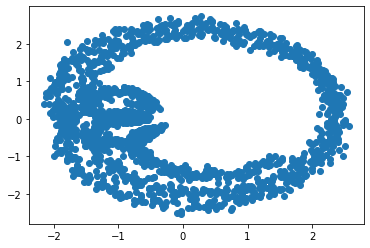

In [670]:
plt.scatter(mars_complex.real, mars_complex.imag)

In [703]:
def animate_real(w_hat, freqs, mars_ys):
    """
    Adapted from <https://github.com/nschloe/epicycler/blob/master/epicycler/main.py>
    """
    fig, ax = plt.subplots(dpi=150)
    fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=None, hspace=None)
    ax.axis("square")

    radii = np.abs(w_hat)

    new_red = "#d62728"
    dot = plt.plot([], [], ".", color=new_red)[0]
    circles = [
        plt.Circle((0.0, 0.0), radius, color="k", fill=False) for radius in radii
    ]

    for circle in circles:
        ax.add_artist(circle)

    xlim = [np.min(mars_ys.real), np.max(mars_ys.real)]
    ylim = [np.min(mars_ys.imag), np.max(mars_ys.imag)]
    width = xlim[1] - xlim[0]
    height = ylim[1] - ylim[0]
    xlim = [xlim[0] - 0.1 * width, xlim[1] + 0.1 * width]
    ylim = [ylim[0] - 0.1 * height, ylim[1] + 0.1 * height]


    ax.set_xlim([xlim[0], xlim[1]])
    ax.set_ylim([ylim[0], ylim[1]])

    plt.plot(mars_ys.real, mars_ys.imag, ".", color="0.7", zorder=0)

    def init():
        return circles + [dot]

    def animate(t):
        vals = w_hat * np.power(freqs, t)
        cs = np.cumsum(vals)
        centers = cs
        for circle, center in zip(circles, centers):
            circle.center = [center.real, center.imag]
        dot.set_data(cs[-1].real, cs[-1].imag)
        return circles + [dot]

    num_frames = 1000

    # dates = [datetime.strptime(time.split(' ')[0], '%Y-%m-%d') for time in raw_data.index.values]
    # dates = [(d0.date() - date(d0.year, 1, 1)).days for d0 in dates][:len(mars_ys)]

    anim = FuncAnimation(
            fig,
            animate,
            init_func=init,
            frames=np.tile(np.linspace(0, 366, num_frames // 5), 5),
            interval=30,
            blit=True,
        )
    
    return anim


### Method

Any regression method operating on the fourier features results in some position in the complex plane. This implies any regression method should operate in ecliptical coordinates (basically complex coordinates).

Since our conceputalizaiton of the universe is 2-D (fourier features are 2D that is) => we can get rid of one of the angular dimensions. In our it makes much more sense to get rid of the latitude $\beta$ since we want the movement of the planets around the earth.

This implies our regression method has a fourier feature matrix (N features for each data point), and solves for the ecliptical coordinates $\lambda$ and $\Delta$ converted to complex coordinates

We cannot simply just use sklearn since we're operating in the complex domain; however as we have learned in class we can use OLS with the conjugate tranpose which results in the same analytical solution.

Theres a fantastic breakdown on the benefits / fit of complex regression vs. multivariate linear regression here: https://stats.stackexchange.com/questions/66088/analysis-with-complex-data-anything-different

In [674]:
mars_y

array([-0.70779762+0.36917867j, -0.87461862+0.43289042j,
       -0.5993863 +0.33112474j, ...,  1.54045796-1.08438005j,
        1.68618672-1.11737511j,  1.6852085 -1.03979047j])

In [675]:
# run linear regression
mars_ols = np.linalg.lstsq(ff, mars_y)

/Users/kaahan/miniconda3/envs/project_s/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


In [676]:
# run ridge regression
# get svd
u, s, vh = np.linalg.svd(ff, full_matrices=False)

In [677]:
lam = 1
mars_ridge = vh.conj().T @ np.linalg.inv(np.diag(s.conj().T) @ np.diag(s) + lam * np.eye(s.shape[0])) @ np.diag(s).conj().T @ u.conj().T @ mars_y

In [678]:
# w = mars_ols[0]
w = mars_ridge.copy()

In [679]:
w

array([-0.02084597-0.00155145j, -0.0216496 +0.0079141j ,
       -0.01872568+0.01792127j, ..., -0.00457575-0.01660951j,
       -0.01118136-0.01438367j, -0.01700746-0.00925567j])

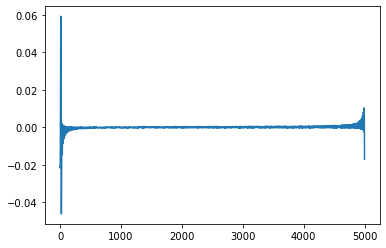

In [680]:
plt.plot(w.real)

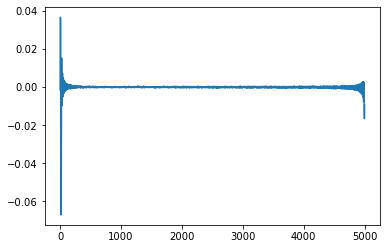

In [681]:
plt.plot(w.imag)

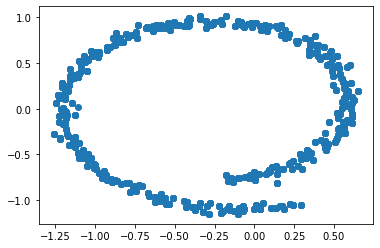

In [682]:
plt.scatter((ff @ w).real, (ff @ w).imag)

In [683]:
np.linalg.norm((ff @ w) - mars_y, 1)

2700.2192481099364

In [726]:
n = 25
# n most important fourier features as determined by regression
top_feats =(-np.abs(w)).argsort()[:n]

In [727]:
# what periods are we taking?
top_feats

array([14, 13, 15, 12, 16, 11, 17, 10, 18,  9, 19,  8, 20,  7,  6, 21,  5,
       22,  4, 23,  3,  2, 24,  1,  0])

In [728]:
w_hat = w[top_feats]
d = len(ff[0])
freqs = np.array([np.power(np.e, 2 * np.pi * 1j * (i / d)) for i in range(d)])[top_feats]

In [729]:
np.linalg.norm((ff[:, top_feats] @ w_hat) - mars_y, 2)

64.95395757221574

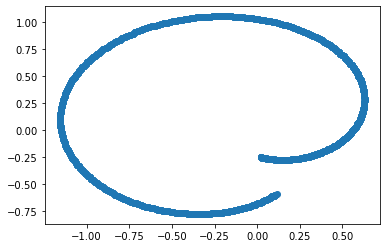

In [730]:
pred = ff[:, top_feats] @ w_hat
plt.scatter(pred.real, pred.imag)

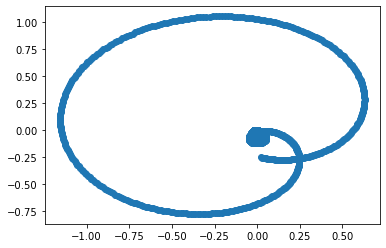

In [733]:
vals = []
for t in range(2000):
    vals.append(w_hat @ np.power(freqs, t))
vals = np.array(vals)
plt.scatter(vals.real, vals.imag)

In [690]:
mars_ys = mars_y

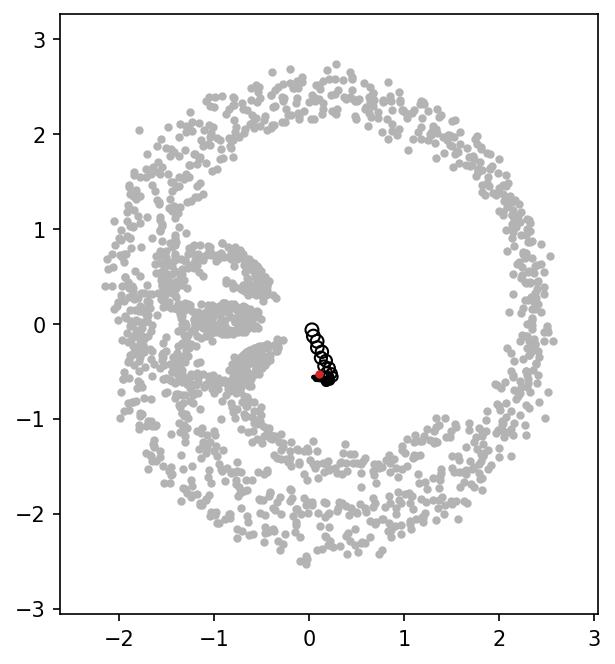

In [704]:
HTML(animate_real(w_hat, freqs, mars_ys).to_html5_video())

### DFT

In [338]:
dft = np.fft.fft(mars_y[::20])

n = 15
# n most important fourier features as determined by dft
top_feats =(-np.abs(dft)).argsort()[:n]

/Users/kaahan/miniconda3/envs/project_s/lib/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


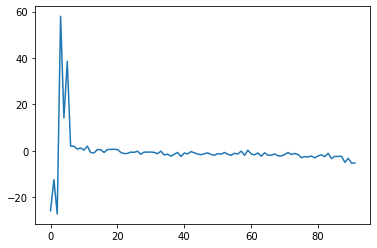

In [339]:
plt.plot(dft)

In [340]:
top_feats

array([ 3,  5,  2,  0,  4,  1,  6, 91,  7, 90,  8,  9, 89, 88, 11])

In [341]:
w_hat = dft[top_feats]
freqs = np.fft.fftfreq(dft.shape[0])[top_feats]

In [342]:
def animate(w_hat, freqs, mars_ys):
    """
    Adapted from <https://github.com/nschloe/epicycler/blob/master/epicycler/main.py>
    """
    fig, ax = plt.subplots(dpi=150)
    fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=None, hspace=None)
    ax.axis("square")
    n = w_hat.shape[0]

    radii = np.abs(w_hat / n)

    new_red = "#d62728"
    dot = plt.plot([], [], ".", color=new_red)[0]
    circles = [
        plt.Circle((0.0, 0.0), radius, color="k", fill=False) for radius in radii
    ]

    for circle in circles:
        ax.add_artist(circle)

    xlim = [np.min(mars_ys.real), np.max(mars_ys.real)]
    ylim = [np.min(mars_ys.imag), np.max(mars_ys.imag)]
    width = xlim[1] - xlim[0]
    height = ylim[1] - ylim[0]
    xlim = [xlim[0] - 0.1 * width, xlim[1] + 0.1 * width]
    ylim = [ylim[0] - 0.1 * height, ylim[1] + 0.1 * height]


    ax.set_xlim([xlim[0], xlim[1]])
    ax.set_ylim([ylim[0], ylim[1]])

    plt.plot(mars_ys.real, mars_ys.imag, ".", color="0.7", zorder=0)

    def init():
        return circles + [dot]

    def animate(t):
        vals = w_hat / n * np.exp(1j * np.multiply.outer(t, n * freqs))
        cs = np.cumsum(vals)
        centers = cs[:-1]
        for circle, center in zip(circles, centers):
            circle.center = [center.real, center.imag]
        dot.set_data(cs[-1].real, cs[-1].imag)
        return circles + [dot]

    num_frames = 300

    # dates = [datetime.strptime(time.split(' ')[0], '%Y-%m-%d') for time in raw_data.index.values]
    # dates = [(d0.date() - date(d0.year, 1, 1)).days for d0 in dates][:len(mars_ys)]
    
    
    anim = FuncAnimation(
            fig,
            animate,
            init_func=init,
            frames=np.linspace(0.0, 2 * np.pi, num_frames),
            interval=50,
            blit=True,
        )
    
    return anim


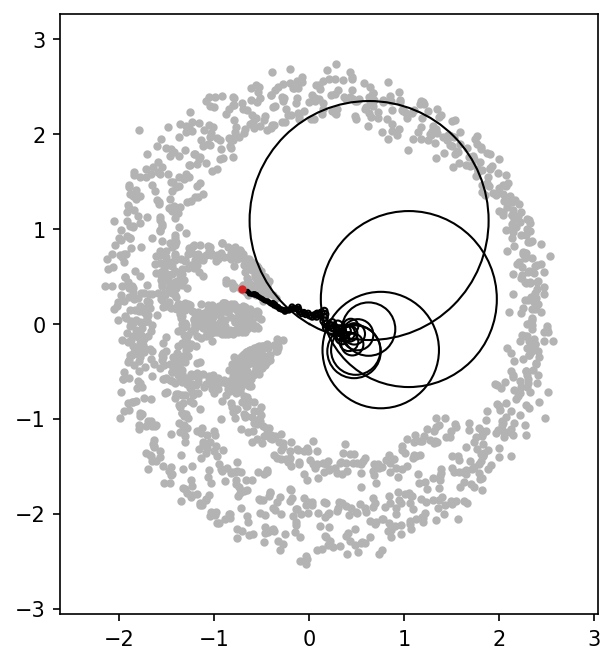

In [346]:
# sort to make animation look good
indices = (-np.abs(dft)).argsort()
HTML(animate(dft[indices], np.fft.fftfreq(dft.shape[0])[indices], mars_y).to_html5_video())

In [738]:
datetime.now().strftime('%m-%d-%Y_%H:%M')

'12-01-2020_20:23'